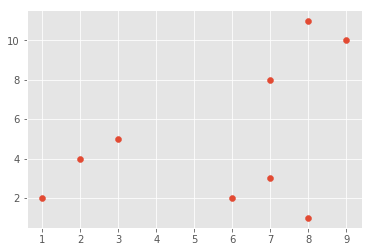

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans

X = np.array([ [1,2], [3,5], [2,4], [7,8], [8,11], [9,10], [6,2], [7,3], [8,1] ])
plt.scatter(X[:,0],X[:,1])

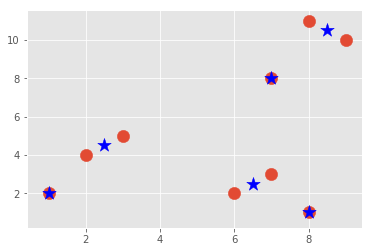

In [13]:
class MeanShift:
    def __init__(self,radius = 2):
        self.radius = radius
        
    def fit(self, data):
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset - centroid) < self.radius:
                        in_bandwidth.append(featureset)
                
                new_centroid = np.average(in_bandwidth , axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            pre_centroids = dict(centroids)
            centroids = {}
            
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], pre_centroids[i]):
                    optimized = False
                if not optimized:
                    break
            
            if optimized:
                break
        self.centroids = centroids
        
        def predict(self,data):
            pass

clf = MeanShift()
clf.fit(X)
centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], marker='*', s=200, color = 'b')
plt.show()